<img src="../common/fun_long_logo-01.png">

# Tutorial on uncertainty propagation in ThermoFun.
Miron et al., (2023). ThermoFun: A C++/Python library for computing standard thermodynamic properties of substances and reactions across wide ranges of temperatures and pressures. Journal of Open Source Software, 8(83), 4624

[![DOI](https://joss.theoj.org/papers/10.21105/joss.04624/status.svg)](https://doi.org/10.21105/joss.04624)

### Import ThermoFun module
ThermoFun delivers thermodynamic properties of substances and reactions at the temperature and pressure of interest.

In [1]:
import thermofun as fun

### Initialize a ThermoFun database record - 
Thermofun needs a database of substances and or reactions. The data is in JSON format. Have a look at the json files '../databases/'. One can also use the available datasets in thermohub database and retrieve them uisng thermohubclient. ThermoHub contains the up to date datasets. 
Another possible source for ThermoFun database files is https://github.com/thermohub/thermohub mirror of thermohub database.

In [2]:
# initalize using a local file
aq17 = fun.Database('../databases/aq17-thermofune.json')

### ThermoFun engine class object
For calculating properties of substances or reactions, at T and P other than reference values, we need a ThermoFun engine class object. This is initialized using a database.

In [3]:
engine = fun.ThermoEngine(aq17)

### Calculate properties of Ca+2 and Calcite dissolution reaction (Calcite = Ca+2 + CO3-2). T = 348.15 K P = 1e5 Pa. 
ThermoFun engine uses SI units, so the values are for 50 C and 1 bar

In [4]:
subst_prop = engine.thermoPropertiesSubstance(298.15, 1e5, "Ca+2")

### Extract the value
The return type of the function is an object that contains the thermodynamic properties 

In [5]:
subst_prop.gibbs_energy.val

-552821.0000018952

In [6]:
subst_prop.gibbs_energy.err

-500.00000000000006

In [7]:
subst_prop.gibbs_energy.ddp

-1.844091659765844e-05

In [8]:
subst_prop.entropy.val

-56.485153151060956

In [9]:
subst_prop.entropy.err

-3.2

In [10]:
subst_prop.gibbs_energy.ddt

56.4851531510603

### Calcite dissolution reaction (Calcite = Ca+2 + CO3-2), logK. print(f'logK (Cal = Ca+2 + CO3-2) is {logK.val}')

In [11]:
reaction_properties = engine.thermoPropertiesReaction(298.15, 0, "Calcite = Ca+2 + CO3-2")
logK = reaction_properties.log_equilibrium_constant
print(f'logK (Calcite = Ca+2 + CO3-2) is {logK.val}')

logK (Calcite = Ca+2 + CO3-2) is -8.478083369428616


In [12]:
logK.err

0.11353701759420286

### Extract the reaction entropy and Gibbs energy. Check the derivative of Gibbs energy with temperature. print(f' Entropy of reaction {Sr.val} is -dGr/dT = {-Gr.ddt}')
The derivatives are corectly calculated for most methods in ThermoFun, if there is a discrepancy then the explicit values should be taken. 

In [13]:
Sr = reaction_properties.reaction_entropy
Gr = reaction_properties.reaction_gibbs_energy

print(f' Entropy of reaction {Sr.val} (explicit) is -dGr/dT = {-Gr.ddt} (implicit)')

 Entropy of reaction -198.98579085791573 (explicit) is -dGr/dT = -198.98579085792625 (implicit)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-axis values
T_values = np.arange(0, 201, 5)

In [15]:
# Example data

logKs = [engine.thermoPropertiesReaction(T+273.15, 0, "Calcite = Ca+2 + CO3-2").log_equilibrium_constant.val for T in T_values]
logKerrors = [engine.thermoPropertiesReaction(T+273.15, 0, "Calcite = Ca+2 + CO3-2").log_equilibrium_constant.err for T in T_values]

# Convert lists to NumPy arrays
logKs = np.array(logKs)
logKerrors = np.array(logKerrors)


In [16]:
logKerrors

array([0.16437633, 0.1483523 , 0.13490511, 0.12440864, 0.11721395,
       0.11353702, 0.11334742, 0.11633409, 0.1219811 , 0.12970043,
       0.13894289, 0.14925299, 0.16027845, 0.1717572 , 0.18349816,
       0.19536329, 0.2072532 , 0.21909647, 0.2308419 , 0.24245289,
       0.25390354, 0.26517579, 0.27625738, 0.28714034, 0.29781994,
       0.30829385, 0.31856156, 0.32862391, 0.33848279, 0.34814082,
       0.35760121, 0.36686756, 0.37594377, 0.38483394, 0.39354229,
       0.40207311, 0.41043074, 0.41861949, 0.42664365, 0.43450745,
       0.44221508])

In [17]:
from common.plotting import set_plot_dimensions

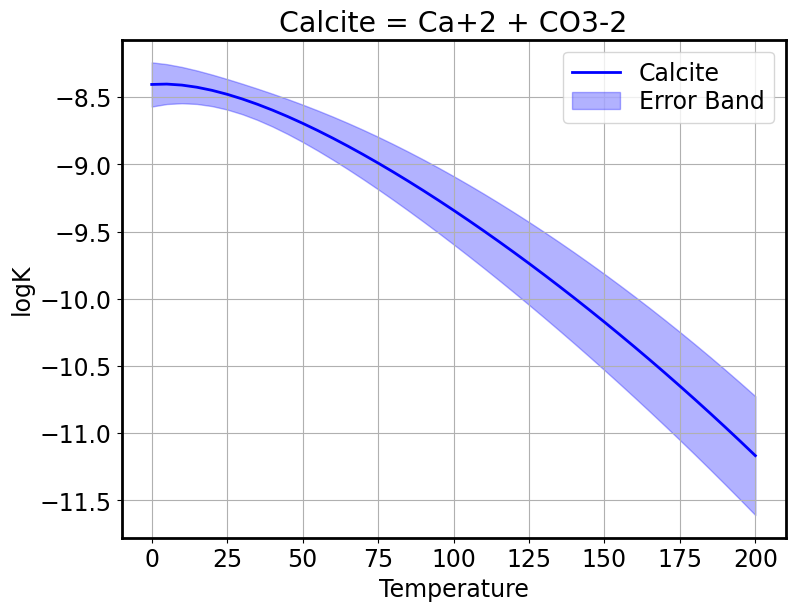

In [18]:
# Calculate upper and lower bounds for the error band
lower_bound = logKs - logKerrors
upper_bound = logKs + logKerrors

set_plot_dimensions()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(T_values, logKs, color='blue', label='Calcite')
plt.fill_between(T_values, lower_bound, upper_bound, color='blue', alpha=0.3, label='Error Band')
plt.xlabel('Temperature')
plt.ylabel('logK')
plt.title('Calcite = Ca+2 + CO3-2')
plt.legend()
plt.grid(True)
#plt.yscale('log')  # Setting y-axis to logarithmic scale
plt.show()